# Balke-Pearl example: [Balke-Pearl](https://drive.google.com/drive/folders/1mLHLrXJI1-z0eMy68Bkljw4gdDImSm0q)

In [1]:
# Imports
import pandas as pd
from dowhy import CausalModel

## Data and Modeling

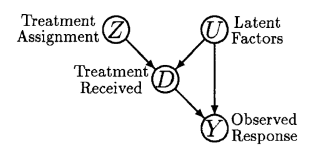

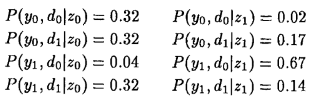

In [3]:
df = pd.read_csv('../../data/balke_pearl.csv')
df.head()

,Z,X,Y
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [5]:
#Step 1: Model
model=CausalModel(
        data = df,
        treatment='X',
        outcome='Y',
        common_causes=['U'],
        instruments=['Z']
        )

C:\Users\lucas\AppData\Roaming\Python\Python311\site-packages\dowhy\causal_model.py:582: UserWarning: 1 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(


## Identifying

In [6]:
# Step 2: Identify
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
No such variable(s) found!

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                   -1⎤
 ⎢ d      ⎛ d       ⎞  ⎥
E⎢────(Y)⋅⎜────([X])⎟  ⎥
 ⎣d[Z]    ⎝d[Z]     ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→Y then ¬(U →→{Z})
Estimand assumption 2, Exclusion: If we remove {Z}→{X}, then ¬({Z}→Y)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



## Estimation

In [8]:
# Step 3: Estimate
# Choose the second estimand: using IV
estimate = model.estimate_effect(identified_estimand,
                                 method_name="iv.instrumental_variable", 
                                 test_significance=True)

print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: iv
Estimand expression:
 ⎡                   -1⎤
 ⎢ d      ⎛ d       ⎞  ⎥
E⎢────(Y)⋅⎜────([X])⎟  ⎥
 ⎣d[Z]    ⎝d[Z]     ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→Y then ¬(U →→{Z})
Estimand assumption 2, Exclusion: If we remove {Z}→{X}, then ¬({Z}→Y)

## Realized estimand
Realized estimand: Wald Estimator
Realized estimand type: EstimandType.NONPARAMETRIC_ATE
Estimand expression:
 ⎡d    ⎤
E⎢──(Y)⎥
 ⎣dZ   ⎦
────────
 ⎡d    ⎤
E⎢──(X)⎥
 ⎣dZ   ⎦
Estimand assumption 1, As-if-random: If U→→Y then ¬(U →→{Z})
Estimand assumption 2, Exclusion: If we remove {Z}→{X}, then ¬({Z}→Y)
Estimand assumption 3, treatment_effect_homogeneity: Each unit's treatment ['X'] is affected in the same way by common causes of ['X'] and ['Y']
Estimand assumption 4, outcome_effect_homogeneity: Each unit's outcome ['Y'] is affected in the same way by common causes of ['X'] and ['Y']

Targe

## Refutation

In [10]:
# Step 4: Refute (Placebo Treatment)
ref = model.refute_estimate(identified_estimand, 
                            estimate, 
                            method_name="placebo_treatment_refuter", 
                            placebo_type="permute") # only permute placebo_type works with IV estimate
print(ref)

Refute: Use a Placebo Treatment
Estimated effect:-1.3636363636363638
New effect:0.0037037037037037164
p value:0.8799999999999999



In [12]:
# Step 4: Refute (Dummy Outcome)
ref = model.refute_estimate(identified_estimand, 
                            estimate, 
                            method_name="dummy_outcome_refuter") 
print(ref[0])

Refute: Use a Dummy Outcome
Estimated effect:0
New effect:-0.016281988605635945
p value:0.9



## Conclusions

- When modeling the data, an error is generated: "*UserWarning: 1 variables are assumed unobserved because they are not in the dataset*"
- The only identified estimand was IV
- The `iv.instrumental_variable` method does not work with binary variables in general. In this case, it yielded an unexpected result $ACE(D\rightarrow Y) = -1.36$
  - For some reason, the method was robust to refutation, even though the result was incorrect. According to the article by Balke and Pearl, the result should be $-0.23\le ACE(D\rightarrow Y)\le -0.15$